**Exploratory Data Analysis for the NFL Cut**

In [1]:
import pandas as pd

file_path = './data/imputed_data.csv'
data = pd.read_csv(file_path)
data.head()

/var/folders/zp/8ykdjlwd1qjdfz83znprmqp00000gn/T/ipykernel_12660/3000203945.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Name,Position,College,Round,Pick,Stat URL,Height,Weight,40 Yard Dash,Bench Press,...,rec_td,rush_att,rush_yds,rush_yds_per_att,rush_td,scrim_att,scrim_yds,scrim_yds_per_att,scrim_td,Year
0,Emmanuel Acho,OLB,Texas,6,204,https://www.sports-reference.com/cfb/players/e...,74.0,238.0,4.64,24.00,...,5.29,199.20,1282.58,8.83,14.91,239.71,1747.91,8.22,20.20,2012
1,Joe Adams,WR,Arkansas,4,104,https://www.sports-reference.com/cfb/players/j...,71.0,179.0,4.51,14.59,...,8.50,4.00,69.50,11.65,0.00,96.00,1393.50,14.45,8.50,2012
2,Chas Alecxih,DT,Pittsburgh,0,0,https://www.sports-reference.com/cfb/players/c...,76.0,296.0,5.31,19.00,...,0.00,1.19,5.20,-0.68,0.36,1.36,5.55,0.86,0.36,2012
3,Frank Alexander,DE,Oklahoma,4,103,https://www.sports-reference.com/cfb/players/f...,76.0,270.0,4.80,24.48,...,2.17,22.98,75.37,4.12,4.24,36.81,231.59,6.49,6.41,2012
4,Antonio Allen,S,South Carolina,7,242,https://www.sports-reference.com/cfb/players/a...,73.0,210.0,4.58,17.00,...,1.68,374.69,2061.25,4.94,19.21,420.39,2397.36,6.43,20.89,2012


**Dataset Features**

In [2]:
data.columns

Index(['Name', 'Position', 'College', 'Round', 'Pick', 'Stat URL', 'Height',
       'Weight', '40 Yard Dash', 'Bench Press', 'Vertical Jump', 'Broad Jump',
       '3 Cone Drill', 'Shuttle', 'conf_abbr', 'games', 'seasons',
       'tackles_solo', 'tackles_assists', 'tackles_total', 'tackles_loss',
       'sacks', 'def_int', 'def_int_yds', 'def_int_td', 'pass_defended',
       'fumbles_rec', 'fumbles_rec_yds', 'fumbles_rec_td', 'fumbles_forced',
       'rec', 'rec_yds', 'rec_yds_per_rec', 'rec_td', 'rush_att', 'rush_yds',
       'rush_yds_per_att', 'rush_td', 'scrim_att', 'scrim_yds',
       'scrim_yds_per_att', 'scrim_td', 'Year'],
      dtype='object')

**Number of College Players Per Position**

In [8]:

data_1= data.loc[:, ['Position']].value_counts().reset_index()
data_1

,Position,count
0,WR,538
1,CB,379
2,RB,342
3,S,237
4,DT,216
5,TE,210
6,DE,193
7,OT,193
8,QB,184
9,LB,176


**Number of College Players per College**

In [9]:

data_2= data.loc[:, ['College']].value_counts().reset_index()
data_2

,College,count
0,Alabama,127
1,LSU,107
2,Georgia,101
3,Florida,94
4,Notre Dame,80
...,...,...
158,North Dakota St.,1
159,Alabama-Birmingham,1
160,Northern Arizona,1
161,Ala-Birmingham,1


**Visualization 1: Analyzing the Impact of Physical Metrics on Draft Rounds**

***Box plots showing the distribution of height and weight across different draft rounds***

/var/folders/zp/8ykdjlwd1qjdfz83znprmqp00000gn/T/ipykernel_12660/1454464748.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x='Round', y='Height', data=data,palette='Set3')
/var/folders/zp/8ykdjlwd1qjdfz83znprmqp00000gn/T/ipykernel_12660/1454464748.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], x='Round', y='Weight', data=data,palette='Set3')


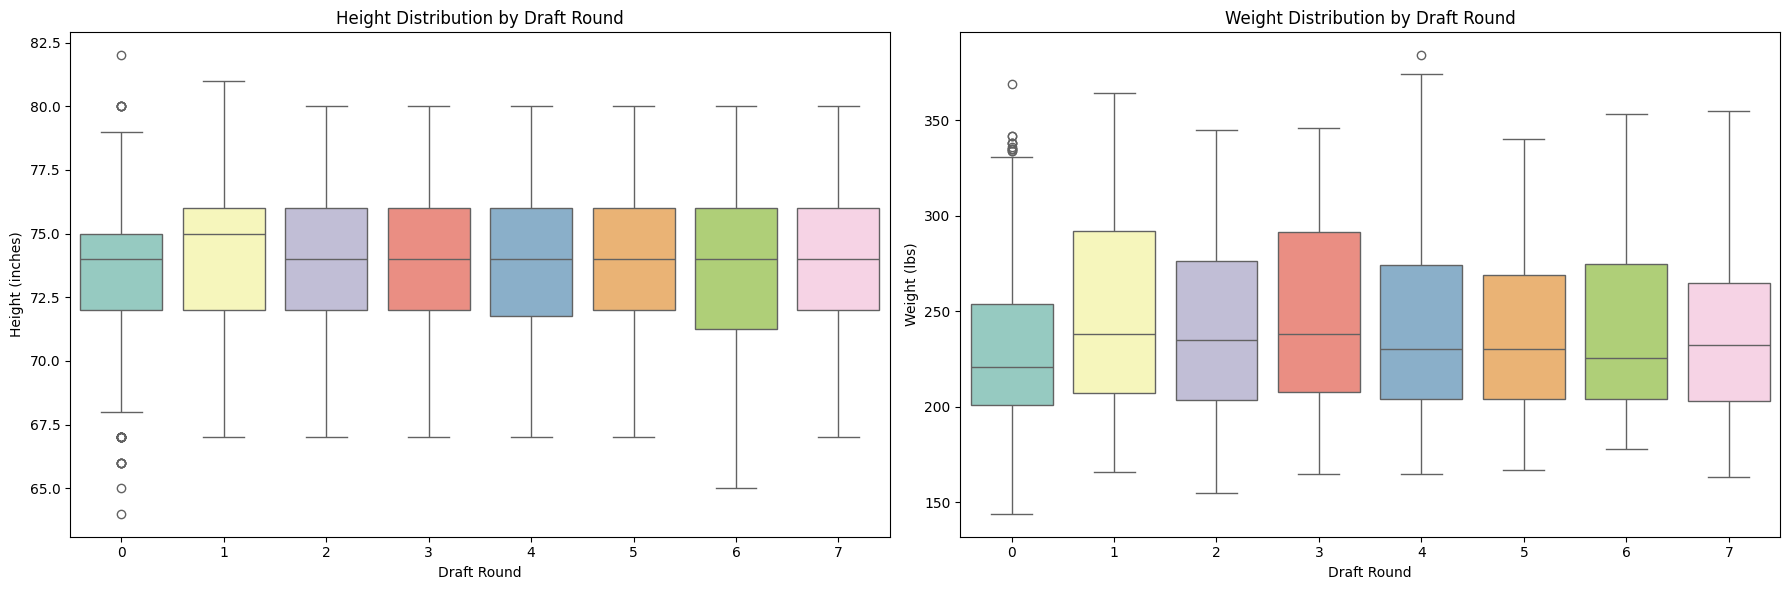

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(18, 6))


sns.boxplot(ax=axes[0], x='Round', y='Height', data=data,palette='Set3')
axes[0].set_title('Height Distribution by Draft Round')
axes[0].set_xlabel('Draft Round')
axes[0].set_ylabel('Height (inches)')


sns.boxplot(ax=axes[1], x='Round', y='Weight', data=data,palette='Set3')
axes[1].set_title('Weight Distribution by Draft Round')
axes[1].set_xlabel('Draft Round')
axes[1].set_ylabel('Weight (lbs)')

plt.tight_layout()
plt.show()


**Visualisation 2: College Performance and Its Correlation with Draft Success**

***Scatter plots comparing college performance metrics (e.g., rushing yards, receiving touchdowns) with draft rounds***

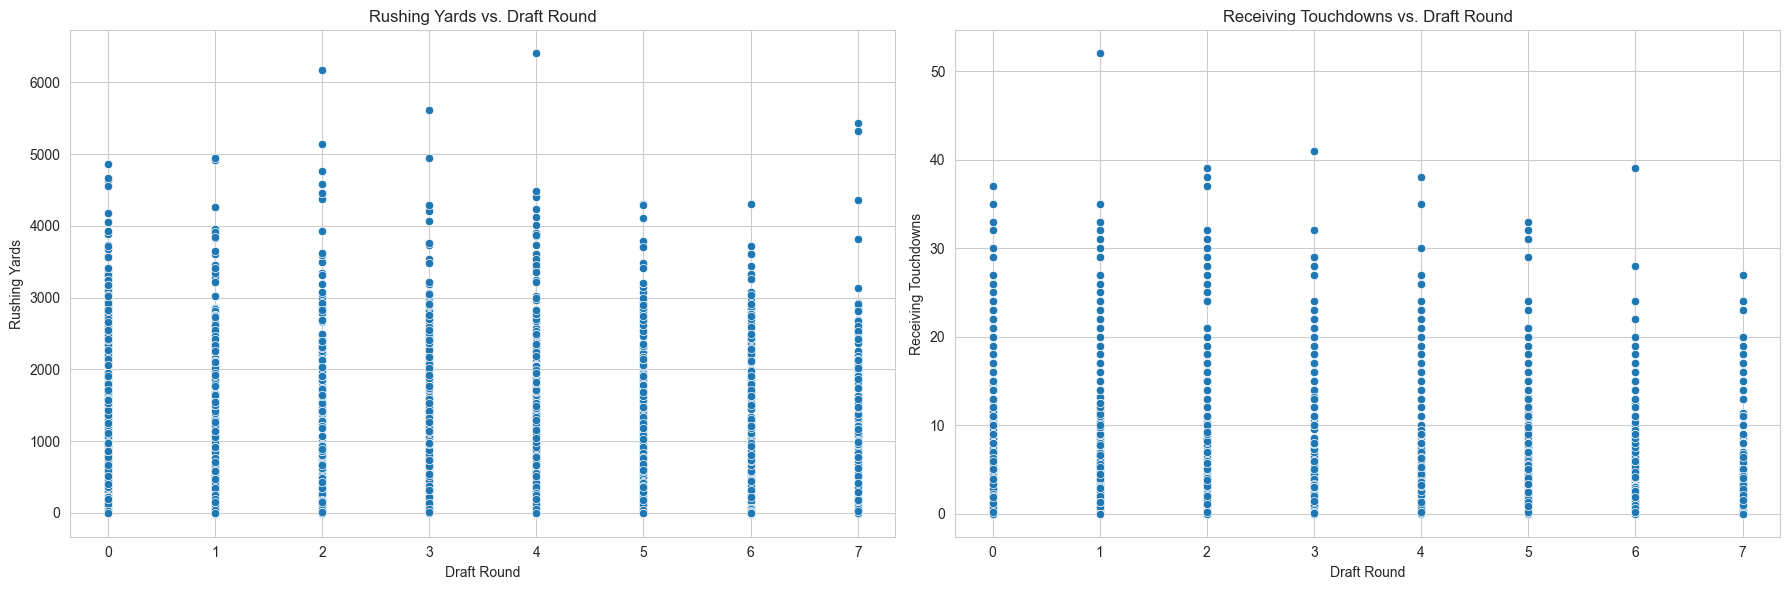

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")


fig, axes = plt.subplots(1, 2, figsize=(18, 6))


sns.scatterplot(ax=axes[0], x='Round', y='rush_yds', data=data)
axes[0].set_title('Rushing Yards vs. Draft Round')
axes[0].set_xlabel('Draft Round')
axes[0].set_ylabel('Rushing Yards')


sns.scatterplot(ax=axes[1], x='Round', y='rec_td', data=data)
axes[1].set_title('Receiving Touchdowns vs. Draft Round')
axes[1].set_xlabel('Draft Round')
axes[1].set_ylabel('Receiving Touchdowns')

plt.tight_layout()
plt.show()


**Visualization 3: Historical Trends in Player Physical Metrics**

***Line graphs depicting the evolution of average player heights and weights over the years.***


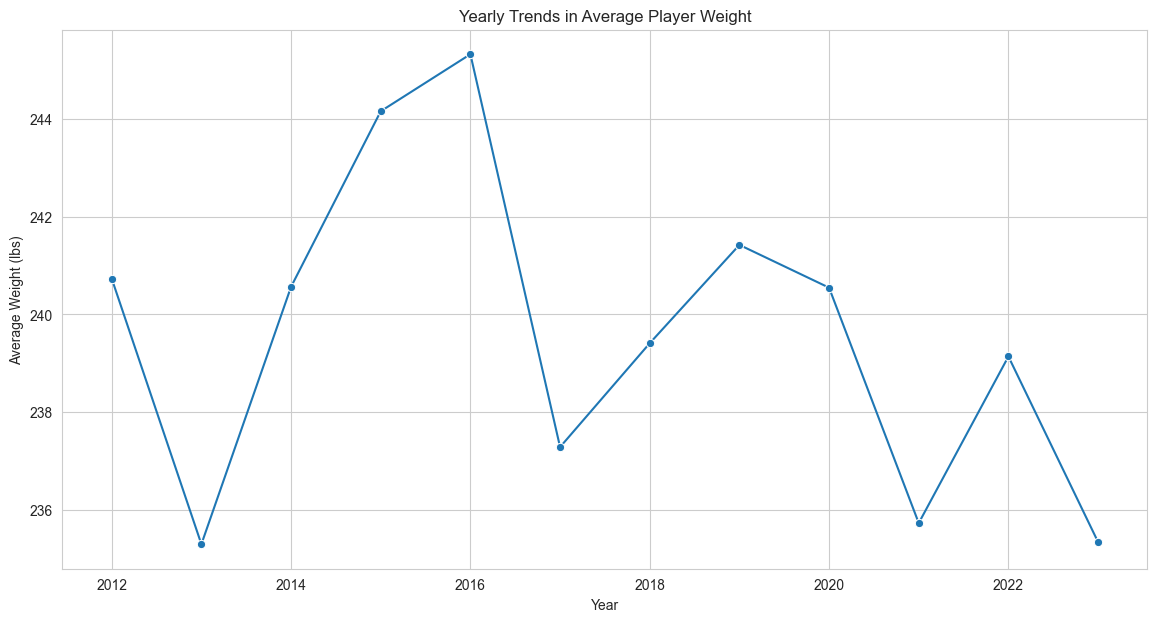

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


average_weight_per_year = data.groupby('Year')['Weight'].mean().reset_index()


plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='Weight', data=average_weight_per_year, marker='o')
plt.title('Yearly Trends in Average Player Weight')
plt.xlabel('Year')
plt.ylabel('Average Weight (lbs)')
plt.grid(True)
plt.show()
